In [136]:
#Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from datetime import date
from datetime import datetime
import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [137]:
#Cargar base de datos de CrunchBase
Argentina = pd.read_csv('ArgentinaCB-5March21.csv')
Brazil = pd.read_csv('BrazilCB-5March21.csv')
Chile = pd.read_csv('ChileCB-5March21.csv')
Colombia = pd.read_csv('ColombiaCB-5March21.csv')
Germany = pd.read_csv('GermanyCB-5March21.csv')
Israel = pd.read_csv('IsraelCB-5March21.csv')
Mexico = pd.read_csv('MexicoCB-5March21.csv')
Spain = pd.read_csv('SpainCB-5March21.csv')
Switzerland = pd.read_csv('SwitzerlandCB-5March21.csv')
Uruguay = pd.read_csv('USACB-5March21.csv')
USA = pd.read_csv('UruguayCB-5March21.csv')
Data_countries = {'Argentina':Argentina,'Brazil':Brazil,'Chile':Chile,'Colombia':Colombia,'Germany':Germany,'Israel':Israel,
                  'Mexico':Mexico,'Spain':Spain,'Switzerland':Switzerland,'Uruguay':Uruguay,'USA':USA}

In [138]:
#Seleccionar columnas a analizar
columns = ['Organization Name','Industries','Estimated Revenue Range','CB Rank (Company)',
           'Operating Status','Number of Articles','Industry Groups','Number of Employees',
           'Number of Funding Rounds','Funding Status','Last Funding Amount',
           'Last Funding Amount Currency (in USD)','Last Funding Type',
           'Last Equity Funding Amount Currency (in USD)','Last Equity Funding Type','Last Funding Date',
           'Total Equity Funding Amount Currency (in USD)','Total Funding Amount Currency (in USD)',
           'Top 5 Investors','Number of Lead Investors','Number of Investors','IPO Status',
           'CB Rank (Organization)']

In [139]:
#Preprocesamiento, iteramos sobre los elementos
for country in Data_countries:
  #Seleccionamos las variables a analizar
  Data_countries[country] = Data_countries[country][columns]
  #Creamoas una nueva, referente a los años
  Data_countries[country]['Year'] = None
  for i,n in enumerate(Data_countries[country]['Number of Employees']):
    #Obtenemos el número de empleados inferior ya que viene en formato #-#
    if isinstance(n,str):
      try:
        Data_countries[country]['Number of Employees'][i] = int(n.split('-')[0])
      except ValueError:
        Data_countries[country]['Number of Employees'][i] = int(n.split('-')[0][:-1])
    #Obtenemos la fecha, y separamos los dias, meses y años
    fecha = Data_countries[country]['Last Funding Date'][i]
    if isinstance(fecha,str):
      year,month,day = tuple(int(time) for time in fecha.split('-'))
    Data_countries[country]['Year'][i] = year
    n = Data_countries[country]['Number of Articles'][i]
  #Creamos una nueva variable con la información del país  
  Data_countries[country]['Country'] = country    

In [140]:
Data_countries['Colombia'].head()

,Organization Name,Industries,Estimated Revenue Range,CB Rank (Company),Operating Status,Number of Articles,Industry Groups,Number of Employees,Number of Funding Rounds,Funding Status,Last Funding Amount,Last Funding Amount Currency (in USD),Last Funding Type,Last Equity Funding Amount Currency (in USD),Last Equity Funding Type,Last Funding Date,Total Equity Funding Amount Currency (in USD),Total Funding Amount Currency (in USD),Top 5 Investors,Number of Lead Investors,Number of Investors,IPO Status,CB Rank (Organization),Year,Country
0,La Haus,"Information Technology, Marketplace, Real Esta...",$1M to $10M,"1,457",Active,8,"Commerce and Shopping, Information Technology,...",101,7.0,Early Stage Venture,35000000.0,35000000.0,Series B,35000000.0,Series B,2021-01-14,57649998.0,58174998.0,"Greenspring Associates, NFX, Spencer Rascoff, ...",3.0,12.0,Private,"1,575",2021,Colombia
1,Elenas,"Beauty, Cosmetics, Direct Sales, E-Commerce",NaN,"2,462",Active,7,"Commerce and Shopping, Consumer Goods, Sales a...",11,3.0,Early Stage Venture,6000000.0,6000000.0,Series A,6000000.0,Series A,2021-03-04,8540000.0,8540000.0,"FJ Labs, Polymath Ventures, Meesho, Alpha4 Ven...",1.0,6.0,Private,"2,632",2021,Colombia
2,Dondo,NaN,NaN,"3,109",Active,12,NaN,11,2.0,Seed,2100000.0,2100000.0,Seed,2100000.0,Seed,2021-01-19,2100000.0,2100000.0,"Alpha Edison, AME Cloud Ventures, Jerry Yang, ...",1.0,13.0,Private,"3,311",2021,Colombia
3,Tpaga,"Financial Services, FinTech, Mobile, Mobile Pa...",Less than $1M,"3,183",Active,16,"Financial Services, Mobile, Payments, Software",51,11.0,Seed,NaN,NaN,Seed,NaN,Seed,2021-03-04,1770000.0,5070000.0,"Y Combinator, Chris Sang, CP Ventures, Zillion...",1.0,15.0,Private,"3,388",2021,Colombia
4,Aflore,"Credit, Finance, Financial Services, FinTech",$1M to $10M,"3,449",Active,4,"Financial Services, Lending and Investments",51,12.0,NaN,6500000.0,6500000.0,Venture - Series Unknown,6500000.0,Venture - Series Unknown,2021-02-05,10550000.0,29092905.0,"Polymath Ventures, Unreasonable Capital, Amado...",3.0,5.0,Private,"3,661",2021,Colombia


In [141]:
#Unimos todos los datasets
Data_total = Data_countries['Argentina'].copy()
for country in list(Data_countries.keys())[1:]:
  Data_total = pd.concat([Data_total,Data_countries[country]])
Data_total.iloc[[500,1500,2500,3500,4500,6500],:]

,Organization Name,Industries,Estimated Revenue Range,CB Rank (Company),Operating Status,Number of Articles,Industry Groups,Number of Employees,Number of Funding Rounds,Funding Status,Last Funding Amount,Last Funding Amount Currency (in USD),Last Funding Type,Last Equity Funding Amount Currency (in USD),Last Equity Funding Type,Last Funding Date,Total Equity Funding Amount Currency (in USD),Total Funding Amount Currency (in USD),Top 5 Investors,Number of Lead Investors,Number of Investors,IPO Status,CB Rank (Organization),Year,Country
500,HUNT Mobile Ads,"Ad Network, Advertising, Mobile, Publishing",NaN,"265,872",Active,3,"Advertising, Content and Publishing, Media and...",11,1.0,M&A,NaN,NaN,Series B,NaN,Series B,2011-09-19,NaN,NaN,"CAP Ventures, Enzyme Venture Capital",NaN,2.0,Private,"284,322",2011,Argentina
500,mobLee,"Event Management, Events, Marketing Automation...",$1M to $10M,"57,158",Active,10,"Events, Media and Entertainment, Mobile, Sales...",11,1.0,Seed,3000000.0,965257.0,Seed,965257.0,Seed,2017-04-18,965257.0,965257.0,Bzplan,NaN,1.0,Private,"59,308",2017,Brazil
500,OrganizaMe,"Financial Services, FinTech, Small and Medium ...",Less than $1M,"207,954",Active,NaN,"Financial Services, Other",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private,"221,937",2011,Chile
500,BCPartners Tech,"Communities, Consulting, Incubators, Informati...",NaN,"348,834",Active,7,"Community and Lifestyle, Financial Services, I...",11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private,"372,925",2020,Colombia
500,Dive,"Audio, Mobile Apps, Podcast, Social Media",NaN,"19,252",Active,4,"Apps, Internet Services, Media and Entertainme...",1,1.0,Seed,200000.0,219032.0,Pre-Seed,219032.0,Pre-Seed,2020-04-01,219032.0,219032.0,NaN,NaN,NaN,Private,"20,038",2020,Germany
500,FetchBug,"Data Integration, Data Mining, Developer APIs,...",NaN,"143,583",Active,NaN,"Data and Analytics, Information Technology, So...",1,1.0,Seed,10000.0,10000.0,Pre-Seed,10000.0,Pre-Seed,2019-05-12,10000.0,10000.0,NaN,NaN,NaN,Private,"151,417",2019,Mexico


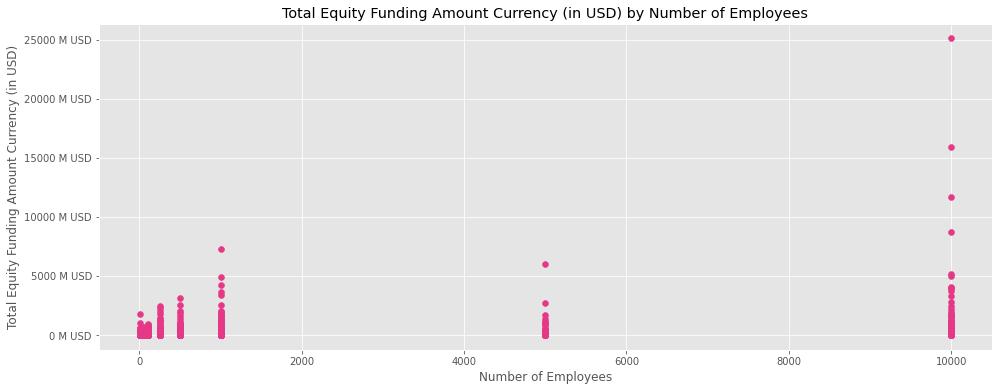

In [142]:
#Graficamos el número de empleados vs el monto acumulado
fig = plt.figure(figsize=(16,6))
plt.style.use('ggplot')
x = Data_total[['Number of Employees','Total Equity Funding Amount Currency (in USD)']]
x = x.dropna()
plt.scatter(x['Number of Employees'],x['Total Equity Funding Amount Currency (in USD)'],c='#E53887')
tiyks = [0,5000000000,10000000000,15000000000,20000000000,25000000000]
tix_label = ['{:.0f} M USD'.format(n/1000000) for n in tiyks]
plt.yticks(tiyks,tix_label)
plt.xlabel('Number of Employees')
plt.ylabel('Total Equity Funding Amount Currency (in USD)')
plt.title('Total Equity Funding Amount Currency (in USD) by Number of Employees')
plt.show()

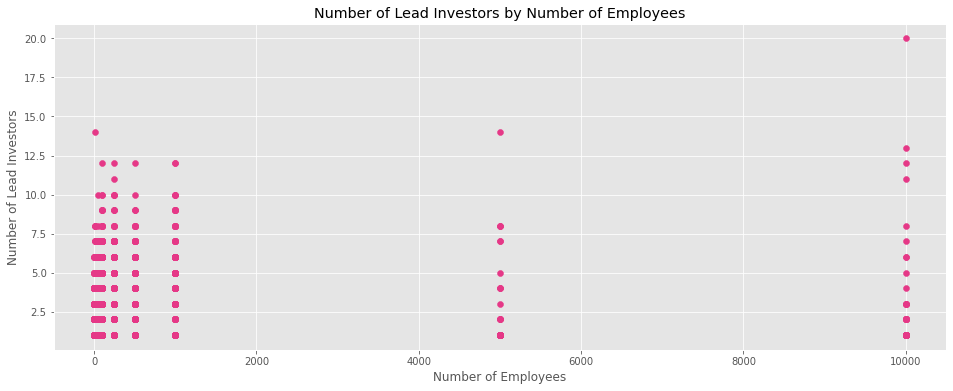

In [143]:
#Graficamos el número de empleados vs el número de inversores
fig = plt.figure(figsize=(16,6))
plt.style.use('ggplot')
x = Data_total[['Number of Employees','Number of Lead Investors']]
x = x.dropna()
plt.scatter(x['Number of Employees'],x['Number of Lead Investors'],c='#E53887')
plt.xlabel('Number of Employees')
plt.ylabel('Number of Lead Investors')
plt.title('Number of Lead Investors by Number of Employees')
plt.show()

In [144]:
#Cargamos la base de datos de Unicorns 2019
Unicorns2019 = pd.read_excel('CB-Insights_Future-Unicorns - copia.xlsx',header=2)
Unicorns2019 = Unicorns2019[Unicorns2019.columns[1:]]
Unicorns2019.columns = ['Company','Industry','Sub-Industry','Total Disclosed Funding ($M)','Country','Select Investors']
Unicorns2019 = Unicorns2019[['Company','Industry','Total Disclosed Funding ($M)','Country','Select Investors']]
for i in range(Unicorns2019.shape[0]):
  m = Unicorns2019['Total Disclosed Funding ($M)'].iloc[i]
  if type(m) == str:
    Unicorns2019['Total Disclosed Funding ($M)'].iloc[i] = None
Unicorns2019['Year'] = 2019
Unicorns2019.head()

,Company,Industry,Total Disclosed Funding ($M),Country,Select Investors,Year
0,Airwallex,Internet Software & Services,102,Australia,"Hillhouse Capital Management, Horizons Venture...",2019
1,Alto Pharmacy,eCommerce,73,United States,"Greenoaks Capital Management, Jackson Square V...",2019
2,Amplitude,Mobile Software & Services,135.97,United States,"Benchmark, Institutional Venture Partners, Seq...",2019
3,Beisen,Internet Software & Services,147.36,China,"Genesis Capital, Sequoia Capital China, Shenzh...",2019
4,Benchling,Internet Software & Services,27.5,United States,"Andreessen Horowitz, Benchmark, Draper Associ...",2019


In [145]:
#Cargamos la base de datos de Unicorns 2020
Unicorns2020 = pd.read_excel('CB-Insights_Future-Unicorns-2020 - copia.xlsx',header=2)
Unicorns2020 = Unicorns2020[Unicorns2020.columns[1:]]
Unicorns2020.columns = ['Company','Industry','Total Disclosed Funding ($M)','Country','Select Investors']
Unicorns2020['Year'] = 2020
Unicorns2020.head()

,Company,Industry,Total Disclosed Funding ($M),Country,Select Investors,Year
0,Alan,Fintech,140.57,France,"Index Ventures, Temasek, DST Global, Partech P...",2020
1,Algolia,Enterprise/Big Data,184.02,United States,"Accel, Index Ventures, Y Combinator, Salesforc...",2020
2,ASAPP,Enterprise/Big Data,192.57,United States,"Emergence Capital Partners, March Capital Part...",2020
3,Attentive Mobile,E-commerce/Retail,164.52,United States,"Sequoia Capital, Institutional Venture Partner...",2020
4,BigID,Enterprise/Big Data,146.10,United States,"Tiger Global Management, Bessemer Venture Part...",2020


In [146]:
#Cargamos la base de datos de Unicorns 2021
Unicorns2021 = pd.read_excel('CB-Insights_Global-Unicorn-Club_2021.xlsx',header=2)
Unicorns2021 = Unicorns2021[Unicorns2021.columns[1:]]
Unicorns2021.columns = ['Company','Total Disclosed Funding ($M)','Country','Industry','Select Investors']
for i,m in enumerate(Unicorns2021['Total Disclosed Funding ($M)']):
  Unicorns2021['Total Disclosed Funding ($M)'][i] = m*1000
Unicorns2021 = Unicorns2021[['Company','Industry','Total Disclosed Funding ($M)','Country','Select Investors']]
Unicorns2021['Year'] = 2021
Unicorns2021.head()

,Company,Industry,Total Disclosed Funding ($M),Country,Select Investors,Year
0,Bytedance,Artificial intelligence,140000.0,China,"Sequoia Capital China, SIG Asia Investments, S...",2021
1,SpaceX,Other,74000.0,United States,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2021
2,Didi Chuxing,Auto & transportation,62000.0,China,"Matrix Partners, Tiger Global Management, Soft...",2021
3,Instacart,"Supply chain, logistics, & delivery",39000.0,United States,"Khosla Ventures, Kleiner Perkins Caufield & By...",2021
4,Stripe,Fintech,36000.0,United States,"Khosla Ventures, LowercaseCapital, capitalG",2021


In [147]:
#Unimos las base de datos Unicorns
 = pd.concat([Unicorns2019,Unicorns2020,Unicorns2021])
Unicorns.iloc[[10,50,100]]

,Company,Industry,Total Disclosed Funding ($M),Country,Select Investors,Year
10,CargoX,Internet Software & Services,95.07,Brazil,"Agility, Blackstone Group, Goldman Sachs, Qual...",2019
0,Alan,Fintech,140.57,France,"Index Ventures, Temasek, DST Global, Partech P...",2020
0,Bytedance,Artificial intelligence,140000,China,"Sequoia Capital China, SIG Asia Investments, S...",2021


In [148]:
#Unimos las bases de datos de CrunchBase con Unicorns respecto a las coinsidencias
Data_total['Unicorns Total Disclosed Funding ($M)'] = None
Data_total['Unicorns Year'] = None
Data_total['Select Investors'] = None
#Creamos las nuevas variables
for i in range(Data_total.shape[0]):
  #Iteramos sobre los elementos de CrunchBase y buscamos coinsidencias con Unicorns
  name = Data_total['Organization Name'].iloc[i]
  names = list(Unicorns['Company'])
  if name in names:
    index = names.index(name)
    #Encontrada la coinsidencia actualizamos los valores de esta
    Data_total['Unicorns Total Disclosed Funding ($M)'].iloc[i] = Unicorns['Total Disclosed Funding ($M)'].iloc[index]
    Data_total['Unicorns Year'].iloc[i] = Unicorns['Year'].iloc[index]
    Data_total['Select Investors'].iloc[i] = Unicorns['Select Investors'].iloc[index]
Data_CrousB_unicorns = Data_total.dropna(subset=['Unicorns Year','Unicorns Total Disclosed Funding ($M)'])
Data_CrousB_unicorns.head()

,Organization Name,Industries,Estimated Revenue Range,CB Rank (Company),Operating Status,Number of Articles,Industry Groups,Number of Employees,Number of Funding Rounds,Funding Status,Last Funding Amount,Last Funding Amount Currency (in USD),Last Funding Type,Last Equity Funding Amount Currency (in USD),Last Equity Funding Type,Last Funding Date,Total Equity Funding Amount Currency (in USD),Total Funding Amount Currency (in USD),Top 5 Investors,Number of Lead Investors,Number of Investors,IPO Status,CB Rank (Organization),Year,Country,Unicorns Total Disclosed Funding ($M),Unicorns Year,Select Investors
119,Front,Internet,$1M to $10M,"76,595",Active,4,Internet Services,1,1.0,Seed,250000.0,250000.0,Pre-Seed,250000.0,Pre-Seed,2018-02-01,2.500000e+05,2.500000e+05,NaN,NaN,NaN,Private,"79,627",2018,Argentina,79.12,2019,"DFJ, Sequoia Capital, Social Capital, Uncork C..."
0,Nubank,"Banking, Credit Cards, Financial Services, Fin...",$100M to $500M,93,Active,124,"Financial Services, Lending and Investments, P...",1001,11.0,Late Stage Venture,400000000.0,400000000.0,Series G,400000000.0,Series G,2021-01-28,1.128300e+09,1.507602e+09,"Goldman Sachs, Tencent Holdings, Ribbit Capita...",12.0,18.0,Private,104,2021,Brazil,25000,2021,"Sequoia Capital, Redpoint e.ventures, Kaszek V..."
1,Loggi,"Delivery, Delivery Service, Internet, Logistic...",$10M to $50M,414,Active,16,"Administrative Services, Internet Services, Tr...",1001,8.0,Late Stage Venture,205000000.0,205000000.0,Series F,205000000.0,Series F,2021-03-01,5.000000e+08,5.000010e+08,"SoftBank, GGV Capital, Dragoneer Investment Gr...",9.0,16.0,Private,459,2021,Brazil,1000,2021,"Qualcomm Ventures, SoftBank Group. Monashees+"
6,Wildlife Studios,"Gaming, Mobile, Video Games",$10B+,"1,348",Active,16,"Gaming, Mobile",501,2.0,Early Stage Venture,120000000.0,120000000.0,Series B,120000000.0,Series B,2020-08-14,1.800000e+08,1.800000e+08,"Vulcan Capital, Benchmark, Bessemer Venture Pa...",2.0,13.0,Private,"1,459",2020,Brazil,3000,2021,"Benchmark, Bessemer Venture Partners"
7,iFood,"Delivery, E-Commerce, Food and Beverage, Food ...",$10M to $50M,"1,351",Active,83,"Administrative Services, Commerce and Shopping...",1001,7.0,Late Stage Venture,500000000.0,500000000.0,Series G,500000000.0,Series G,2018-11-13,5.918600e+08,5.918600e+08,"Movile, Just Eat, Innova Capital, Prosus & Nas...",4.0,5.0,Private,"1,462",2018,Brazil,1000,2021,"Movile, Just Eat, Naspers"


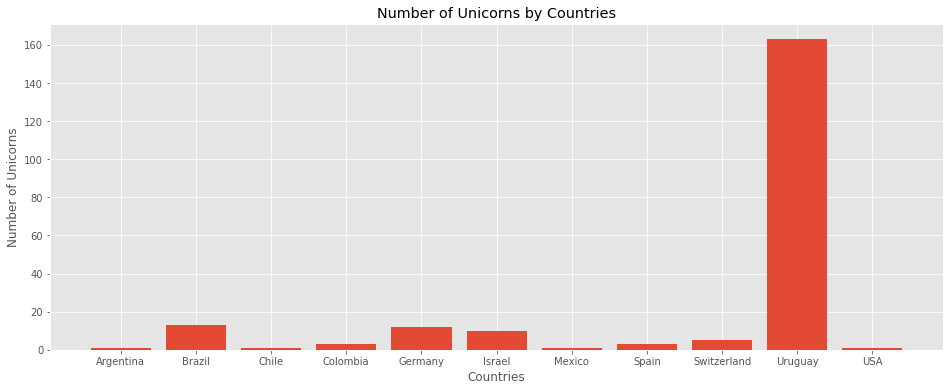

In [149]:
#Graficamos el total Unicorns encontrados en cada país
countries = list(Data_countries.keys())
Total_uni = [0]*len(countries)
for i in range(Data_CrousB_unicorns.shape[0]):
  index = countries.index(Data_CrousB_unicorns['Country'].iloc[i])
  Total_uni[index] += 1
fig = plt.figure(figsize=(16,6))
plt.style.use('ggplot')
plt.bar(countries,Total_uni,label='Unicorns')
plt.xlabel('Countries')
plt.ylabel('Number of Unicorns')
plt.title('Number of Unicorns by Countries')
plt.show()

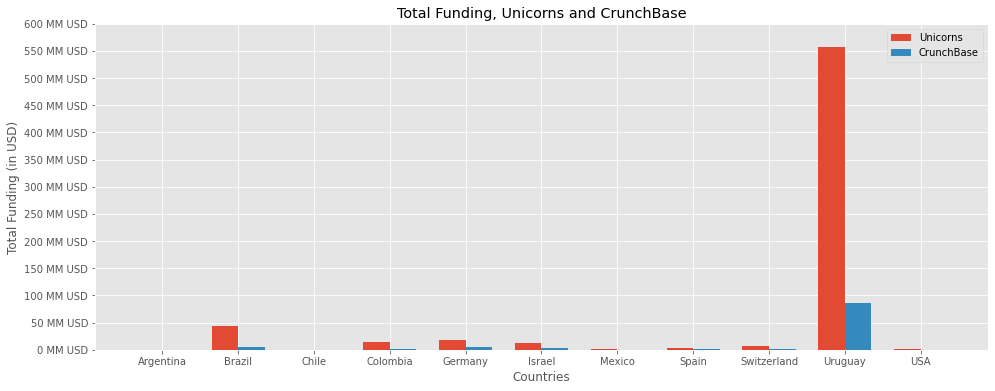

In [162]:
#Miramos la diferencia de montos encontrados en CrunchBase y Unicorns
countries = list(Data_countries.keys())
Total_uni = [0]*len(countries)
Total_cros = [0]*len(countries)
for i in range(Data_CrousB_unicorns.shape[0]):
  index = countries.index(Data_CrousB_unicorns['Country'].iloc[i])
  Total_uni[index] += (Data_CrousB_unicorns['Unicorns Total Disclosed Funding ($M)'].iloc[i])*1000000
  if Data_CrousB_unicorns['Total Equity Funding Amount Currency (in USD)'].iloc[i]>0:
    Total_cros[index] += Data_CrousB_unicorns['Total Equity Funding Amount Currency (in USD)'].iloc[i]

fig = plt.figure(figsize=(16,6))
plt.style.use('ggplot')
width = 0.35
x = np.arange(len(Total_cros))
plt.bar(x - width/2,Total_uni,width,label='Unicorns')
plt.bar(x + width/2,Total_cros,width,label='CrunchBase')
plt.xticks(x,labels=countries)
plt.legend()
tiyks = np.arange(0,6.5,0.5)*100000000000
tix_label = ['{:.0f} MM USD'.format(n/1000000000) for n in tiyks]
plt.yticks(tiyks,tix_label)
plt.xlabel('Countries')
plt.ylabel('Total Funding (in USD)')
plt.title('Total Funding, Unicorns and CrunchBase')
plt.show()